In [10]:
import os
import sys

from pathlib import Path

### TESTING: filter_dataset.py 

In [11]:
!rm -rf /root/workspace/datasets/*
!python filter_dataset.py

input: /root/workspace/yolo/fine-tune/datasets/uecfood100-yolo
class_names: {0: 'rice', 1: 'eels on rice', 2: 'pilaf', 3: "chicken-'n'-egg on rice", 4: 'pork cutlet on rice', 5: 'beef curry', 6: 'sushi', 7: 'chicken rice', 8: 'fried rice', 9: 'tempura bowl', 10: 'bibimbap', 11: 'toast', 12: 'croissant', 13: 'roll bread', 14: 'raisin bread', 15: 'chip butty', 16: 'hamburger', 17: 'pizza', 18: 'sandwiches', 19: 'udon noodle', 20: 'tempura udon', 21: 'soba noodle', 22: 'ramen noodle', 23: 'beef noodle', 24: 'tensin noodle', 25: 'fried noodle', 26: 'spaghetti', 27: 'Japanese-style pancake', 28: 'takoyaki', 29: 'gratin', 30: 'sauteed vegetables', 31: 'croquette', 32: 'grilled eggplant', 33: 'sauteed spinach', 34: 'vegetable tempura', 35: 'miso soup', 36: 'potage', 37: 'sausage', 38: 'oden', 39: 'omelet', 40: 'ganmodoki', 41: 'jiaozi', 42: 'stew', 43: 'teriyaki grilled fish', 44: 'fried fish', 45: 'grilled salmon', 46: 'salmon meuniere', 47: 'sashimi', 48: 'grilled pacific saury', 49: 'sukiy

### DONE: filter_dataset.py

#### HELPER FUNCTION: display label bboxes on images

In [12]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

from box_utils import poly2bbox


def display_labels(labels, path, box_color="red", show=True, save=False, output_dir="./bbox_images"):
    img = Image.open(path)
    width, height = img.size
    
    draw = ImageDraw.Draw(img)
    for label in labels:
        bbox = poly2bbox(label['bbox'])        
        x1 = int(bbox[0] * width)
        y1 = int(bbox[1] * height)
        x2 = int(bbox[2] * width)
        y2 = int(bbox[3] * height)

        draw.rectangle([x1, y1, x2, y2], outline=box_color, width=7)
        draw.text((x1 + 8, y1 + 8), label['class'], fill="black", font=ImageFont.load_default(size=15))

    if save:
        output_path = os.path.join(output_dir, f"{os.path.basename(path)}")
        img.save(output_path)

    if show:
        plt.imshow(img)
        plt.axis("off")
        plt.show()
        
        
def display_bbox(bbox, path, show=True, save=False, output_dir="./bbox_images"):
    img = Image.open(path)
    width, height = img.size

    x1 = int(bbox[0] * width)
    y1 = int(bbox[1] * height)
    x2 = int(bbox[2] * width)
    y2 = int(bbox[3] * height)

    draw = ImageDraw.Draw(img)
    draw.rectangle([x1, y1, x2, y2], outline="red", width=7)

    if save:
        base_name = os.path.splitext(os.path.basename(path))[0]
        ext = os.path.splitext(path)[1]
        output_path = os.path.join(output_dir, f"{base_name}{ext}")
        counter = 2
        while os.path.exists(output_path):
            output_path = os.path.join(output_dir, f"{base_name}_{counter}{ext}")
            counter += 1
        
        img.save(output_path)

    if show:
        plt.imshow(img)
        plt.axis("off")
        plt.show()

In [13]:
def display_all_img_labels(
        img_path, 
        pred_labels, 
        gt_labels, 
        pred_color="red", 
        gt_color="blue", 
        show=True, 
        save=False, 
        output_dir="./bbox_images"
    ):
    img = Image.open(img_path)
    draw = ImageDraw.Draw(img)
    
    draw = annotate_img_canvas(img, draw, pred_labels, pred_color)
    draw = annotate_img_canvas(img, draw, gt_labels, gt_color)

    if save:
        output_path = os.path.join(output_dir, f"{os.path.basename(path)}")
        img.save(output_path)
    
    if show:
        plt.imshow(img)
        plt.axis("off")
        plt.show()


def annotate_img_canvas(img: Image, canvas: ImageDraw.ImageDraw, labels, box_color):
    width, height = img.size

    for label in labels:
        bbox = poly2bbox(label['bbox'])        
        x1 = int(bbox[0] * width)
        y1 = int(bbox[1] * height)
        x2 = int(bbox[2] * width)
        y2 = int(bbox[3] * height)

        canvas.rectangle([x1, y1, x2, y2], outline=box_color, width=7)
        canvas.text((x1 + 8, y1 + 8), label['class'], fill="black", font=ImageFont.load_default(size=15))
    
    return canvas

#### PATHS: UECFOOD100

In [14]:
uecfood100_path = Path("/root/workspace/datasets/uecfood100_filtered")
uecfood100_split_path = Path("/root/workspace/datasets/uecfood100_filtered/val")

### TESTING: inference.py (inference_final.py, data_loader.py, box_utils.py)

##### TESTING func: load_ground_truth v1, v2 (data_loader.py)

In [15]:
from data_loader import load_ground_truth, load_ground_truth_v2


gt = load_ground_truth(uecfood100_path, uecfood100_split_path)
gt_v2 = load_ground_truth_v2(uecfood100_path, uecfood100_split_path)

In [16]:
def v2_to_v1_conv(gt_v2):
    return [[b for box in t.values() for b in box] for t in gt_v2]

In [17]:
gt_v2_conv = v2_to_v1_conv(gt_v2)
gt == gt_v2_conv

True

In [18]:
def display_ground_truth(gt_v2, no_images=5):
    display_count = 0
    for truth in gt_v2:
        image_path, labels = next(iter(truth.items()))

        if display_count >= no_images:
            return
        
        if display_count < no_images and labels != []:
            display_labels(labels, image_path, show=True, save=False)
            display_count += 1

In [19]:
# display_ground_truth(gt_v2)

##### DONE: load_ground_truth

##### IMPROVING func: normalize_predictions (inference.py / inference_final.py)
write normalize_predictions_v2, CHANGES: add image paths from the dataset to output data

In [20]:
from ultralytics import YOLO

from inference_final import process_split, normalize_predictions


yolo11_path = "/root/workspace/yolo/models/yolo11n.pt"
yolo11_model = YOLO(yolo11_path)

uecfood100_to_YOLO_map = {
    "sandwiches": "sandwich"
}

raw_results = process_split(uecfood100_split_path, yolo11_model, pred_conf=0.8)
predictions = normalize_predictions(raw_results, fix_map=uecfood100_to_YOLO_map)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



image 1/2558 /root/workspace/datasets/uecfood100_filtered/val/images/1004.jpg: 480x640 (no detections), 56.9ms
image 2/2558 /root/workspace/datasets/uecfood100_filtered/val/images/1006.jpg: 480x640 (no detections), 8.4ms
image 3/2558 /root/workspace/datasets/uecfood100_filtered/val/images/1015.jpg: 640x480 1 cup, 44.5ms
image 4/2558 /root/workspace/datasets/uecfood100_filtered/val/images/103.jpg: 512x640 1 bowl, 47.1ms
image 5/2558 /root/workspace/datasets/uecfood100_filtered/val/images/1035.jpg: 512x640 (no detections), 6.4ms
image 6/2558 /root/workspace/datasets/uecfood100_filtered/val/images/1037.jpg: 480x640 (no detections), 6.7ms
image 7/2558 /root/workspace/datasets/uecfood100_filtered/val/images/1039.jpg: 480x640 (no detections), 6.3ms
image 8/2558 /root/workspace/datasets/uecfood100_filtered/val/images/1055.jpg: 480x640 (no detections), 6.3ms
image 9/2558 /root/workspace/datasets/uecfood100_filtered/val/images/10574.jpg: 640x480 (no detections), 6.6ms
image 10/2558 /root/worksp

In [21]:
from box_utils import tensor2poly

FOOD_CLASSES = ["banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake"]


def normalize_predictions_v2(predictions, filter=FOOD_CLASSES, fix_map={}):
    norm_preds = []
    for p in predictions:
        class_map = p.names
        norm_boxes = []
        for box in p.boxes:
            predicted_class = class_map[int(box.cls)]
            predicted_class = fix_map.get(predicted_class, predicted_class)

            if predicted_class in filter:                
                predicted_class = fix_map.get(predicted_class, predicted_class)
                bbox = tensor2poly(box.xyxyn)
                norm_boxes.append({
                    "class": predicted_class,
                    "score": float(box.conf),
                    "bbox": bbox
                })
        
        norm_preds.append({f"{p.path}": norm_boxes})
    
    return norm_preds

In [22]:
predictions_v2 = normalize_predictions_v2(raw_results, fix_map=uecfood100_to_YOLO_map)

In [23]:
predicted_classes = set()
for p in predictions_v2:
    for image_path, pred_labels in p.items():
        pc = [p['class'] for p in pred_labels]
        predicted_classes.update(pc)

predicted_classes

{'apple',
 'banana',
 'broccoli',
 'cake',
 'carrot',
 'donut',
 'hot dog',
 'orange',
 'pizza',
 'sandwich'}

In [24]:
def display_predictions(predictions_v2, no_images=0):
    display_count = 0
    for prediction in predictions_v2:
        image_path, labels = next(iter(prediction.items()))
        # print(labels)
        
        if display_count >= no_images:
            return
        
        if no_images >= display_count and labels != []:
            display_labels(labels, image_path, show=True, save=False)
            display_count += 1

In [25]:
def display_all_labels(preds, gt, no_imgs=3):
    if [list(p.keys())[0] for p in preds] != [list(t.keys())[0] for t in gt]:
        return
    
    display_count = 0
    for p, t in zip(preds, gt):
        img_path = list(p.keys())[0]
        p_labels = p[img_path]
        t_labels = t[img_path]

        if display_count >= no_imgs:
            return
        
        
        
        if no_imgs >= display_count and p_labels and t_labels: # and t_labels[0]['class'] != "hot dog":
        # if no_imgs >= display_count and (p_labels or t_labels):
        # if no_imgs >= display_count and t_labels:
            display_all_img_labels(img_path, p_labels, t_labels)
            print(img_path)
            print(t_labels)
            display_count += 1

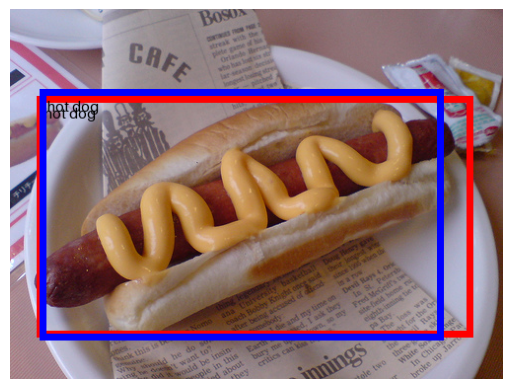

/root/workspace/datasets/uecfood100_filtered/val/images/13492.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.06 0.219, 0.88 0.219, 0.88 0.893, 0.06 0.893, 0.06 0.219))>}]


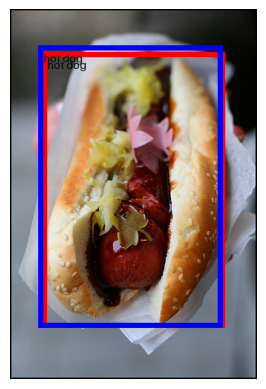

/root/workspace/datasets/uecfood100_filtered/val/images/13498.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.117 0.1, 0.859 0.1, 0.859 0.86, 0.117 0.86, 0.117 0.1))>}]


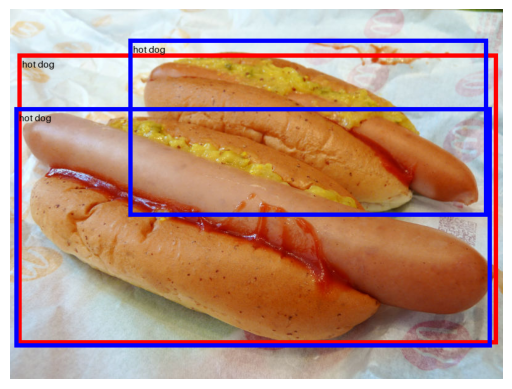

/root/workspace/datasets/uecfood100_filtered/val/images/13511.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.01 0.267, 0.976 0.267, 0.976 0.913, 0.01 0.913, 0.01 0.267))>}, {'class': 'hot dog', 'bbox': <POLYGON ((0.241 0.08, 0.969 0.08, 0.969 0.56, 0.241 0.56, 0.241 0.08))>}]


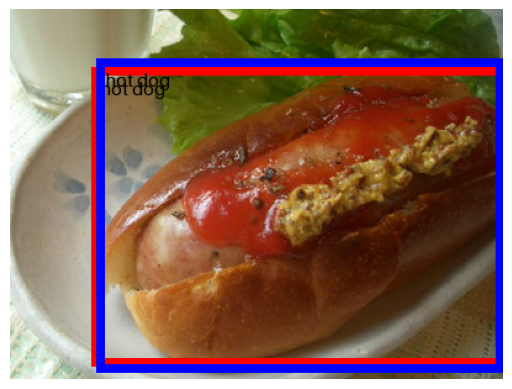

/root/workspace/datasets/uecfood100_filtered/val/images/13513.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.175 0.133, 1 0.133, 1 0.98, 0.175 0.98, 0.175 0.133))>}]


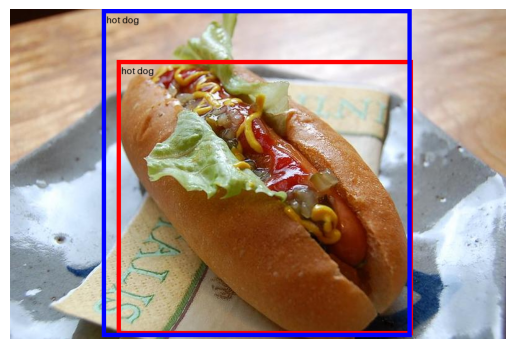

/root/workspace/datasets/uecfood100_filtered/val/images/13517.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.186 0, 0.809 0, 0.809 0.992, 0.186 0.992, 0.186 0))>}]


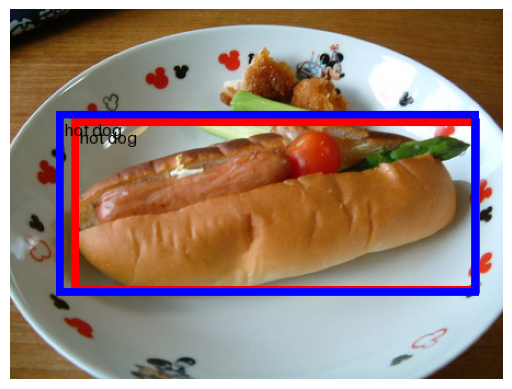

/root/workspace/datasets/uecfood100_filtered/val/images/13526.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.096 0.275, 0.951 0.275, 0.951 0.772, 0.096 0.772, 0.096 0.275))>}]


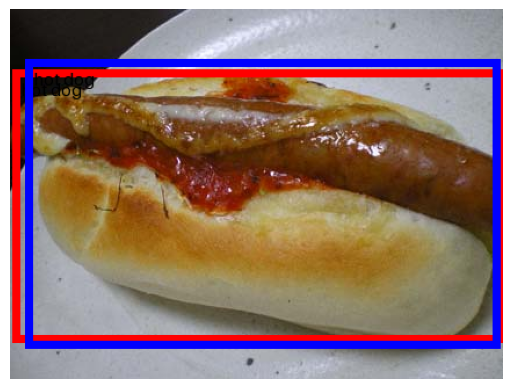

/root/workspace/datasets/uecfood100_filtered/val/images/13530.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.031 0.138, 0.993 0.138, 0.993 0.918, 0.031 0.918, 0.031 0.138))>}]


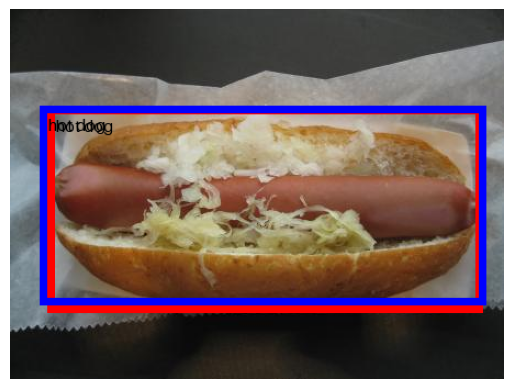

/root/workspace/datasets/uecfood100_filtered/val/images/13534.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.062 0.261, 0.964 0.261, 0.964 0.798, 0.062 0.798, 0.062 0.261))>}]


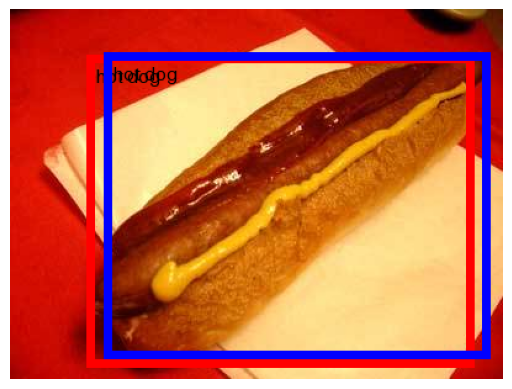

/root/workspace/datasets/uecfood100_filtered/val/images/13536.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.19 0.12, 0.972 0.12, 0.972 0.947, 0.19 0.947, 0.19 0.12))>}]


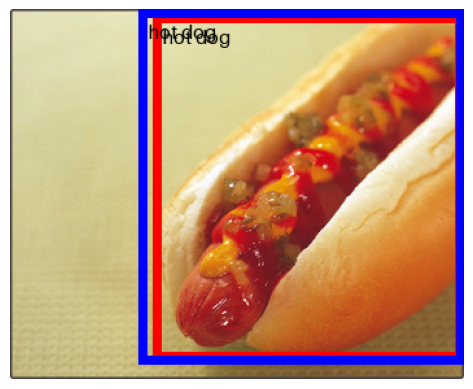

/root/workspace/datasets/uecfood100_filtered/val/images/13549.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.283 0.004, 1 0.004, 1 0.961, 0.283 0.961, 0.283 0.004))>}]


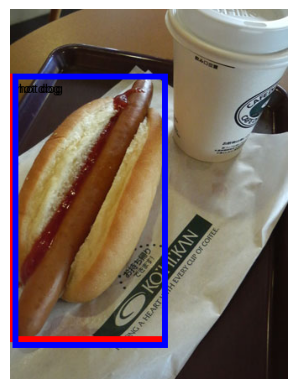

/root/workspace/datasets/uecfood100_filtered/val/images/13551.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.012 0.175, 0.568 0.175, 0.568 0.914, 0.012 0.914, 0.012 0.175))>}]


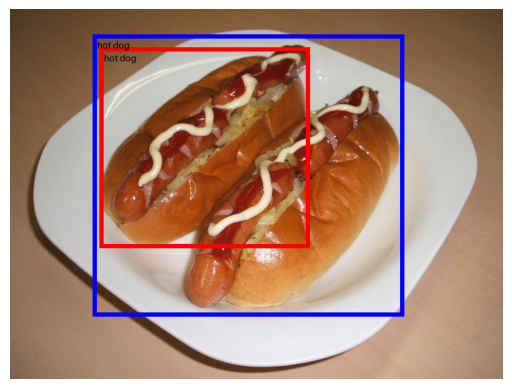

/root/workspace/datasets/uecfood100_filtered/val/images/13552.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.168 0.068, 0.799 0.068, 0.799 0.83, 0.168 0.83, 0.168 0.068))>}]


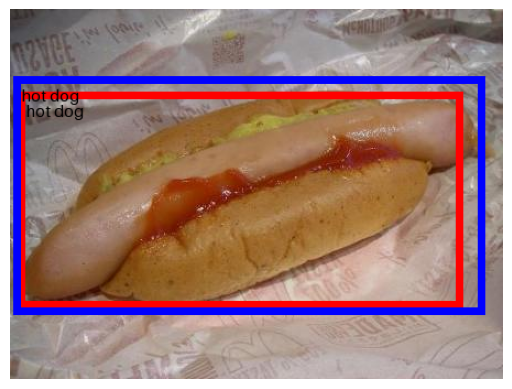

/root/workspace/datasets/uecfood100_filtered/val/images/13558.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.007 0.185, 0.964 0.185, 0.964 0.827, 0.007 0.827, 0.007 0.185))>}]


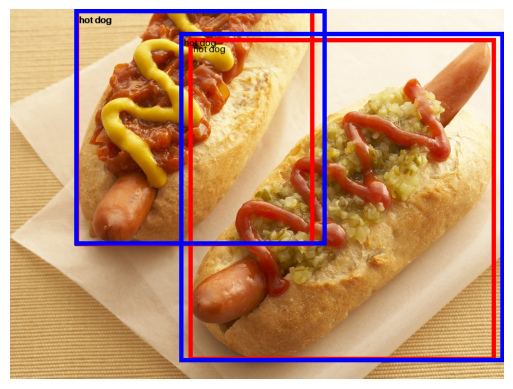

/root/workspace/datasets/uecfood100_filtered/val/images/13559.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.342 0.062, 1 0.062, 1 0.953, 0.342 0.953, 0.342 0.062))>}, {'class': 'hot dog', 'bbox': <POLYGON ((0.13 0, 0.64 0, 0.64 0.638, 0.13 0.638, 0.13 0))>}]


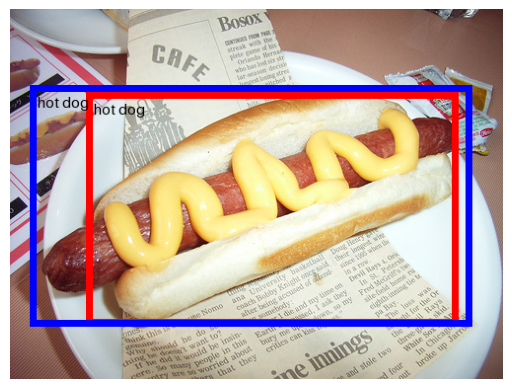

/root/workspace/datasets/uecfood100_filtered/val/images/13562.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.042 0.205, 0.936 0.205, 0.936 0.856, 0.042 0.856, 0.042 0.205))>}]


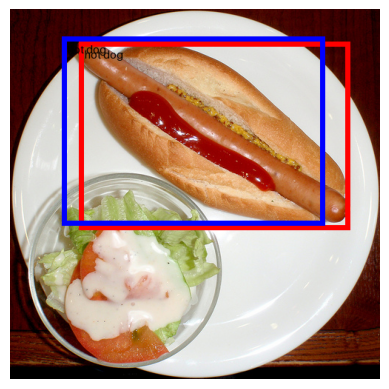

/root/workspace/datasets/uecfood100_filtered/val/images/13564.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.14 0.074, 0.85 0.074, 0.85 0.584, 0.14 0.584, 0.14 0.074))>}]


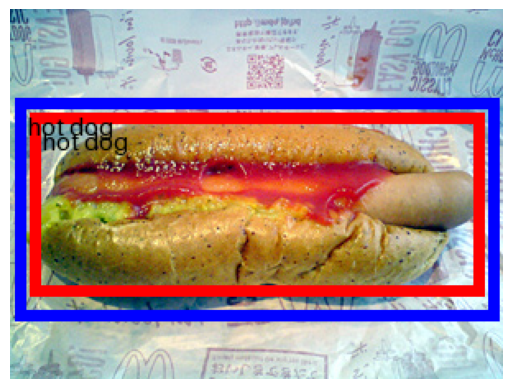

/root/workspace/datasets/uecfood100_filtered/val/images/13568.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.01 0.244, 0.99 0.244, 0.99 0.844, 0.01 0.844, 0.01 0.244))>}]


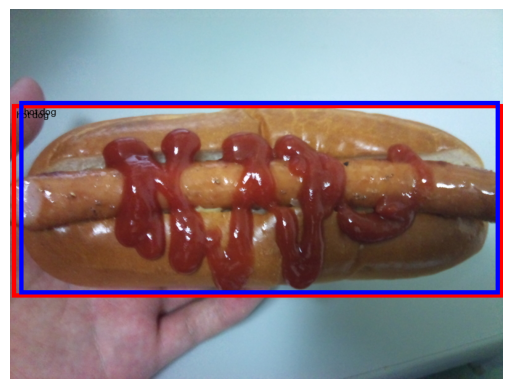

/root/workspace/datasets/uecfood100_filtered/val/images/13647.jpg
[{'class': 'hot dog', 'bbox': <POLYGON ((0.02 0.25, 0.992 0.25, 0.992 0.772, 0.02 0.772, 0.02 0.25))>}]


In [26]:
# display_predictions(predictions_v2)
display_all_labels(predictions_v2, gt_v2, no_imgs=18)

In [56]:
del sys.modules['evaluate']

from evaluate import evaluate_detections, gather_ground_truths, gather_predictions


del sys.modules['inference_final']
from inference_final import process_split, normalize_predictions

In [57]:
gathered_gt = gather_ground_truths(gt)

In [58]:
gathered_preds = gather_predictions(predictions)

In [59]:
evals = evaluate_detections(gt, predictions, conf_threshold=0.5)

In [60]:
evals

{'precision': 0.200836820083682,
 'recall': 0.46153846153846156,
 'mAP@0.5': 0.10658774164411039,
 'mAP@0.5:0.95': 0.08810654600699397}

In [61]:
simplefood_path = Path("/root/workspace/datasets/simple-food_filtered")
simplefood_split_path = Path("/root/workspace/datasets/simple-food_filtered/test")
simplefood_model_path = "/root/workspace/yolo/models/food-fine-tuned/food_detector_simple-v1.pt"
simplefood_YOLO_fix_map = {}

vfn_path = Path("/root/workspace/datasets/vfn_filtered")
vfn_split_path = Path("/root/workspace/datasets/vfn_filtered/test")
vfn_model_path = "/root/workspace/yolo/models/food-fine-tuned/food_detector_simple-v1.pt"
vfn_YOLO_fix_map = {
    "bananas": "banana",
    "cheese_sandwiches": "sandwich",
    "hot_dog": "hot dog"
}

uecfood100_path = Path("/root/workspace/datasets/uecfood100_filtered")
uecfood100_split_path = Path("/root/workspace/datasets/uecfood100_filtered/val")
uecfood100_model_path = "/root/workspace/yolo/models/food-fine-tuned/food_detector_simple-v1.pt"
uecfood100_YOLO_map = {
    "sandwiches": "sandwich"
}

YOLO_FOOD_CLASSES = ["banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake"]

In [71]:
def experiment(ds_path, split_path, model_path, fix_map):
    yolo11_path = "/root/workspace/yolo/models/yolo11n.pt"
    yolo11_model = YOLO(yolo11_path)

    gt = load_ground_truth(ds_path, split_path)
    yolo_raw_results = process_split(split_path, yolo11_model, pred_conf=0.5)
    yolo_predictions = normalize_predictions(yolo_raw_results, fix_map=fix_map, filter=YOLO_FOOD_CLASSES)
    print("YOLO METRICS:")
    yolo_evals = evaluate_detections(gt, yolo_predictions, conf_threshold=0.5)
    print(yolo_evals)

    model = YOLO(model_path)
    model_raw_results = process_split(split_path, model, pred_conf=0.5)
    model_predictions = normalize_predictions(model_raw_results, fix_map=fix_map, nofilter=True)
    print("\nMODEL METRICS:")
    model_evals = evaluate_detections(gt, model_predictions, conf_threshold=0.5)
    print(model_evals)

In [74]:
# experiment(vfn_path, vfn_split_path, vfn_model_path, vfn_YOLO_fix_map)
experiment(simplefood_path, simplefood_split_path, simplefood_model_path, simplefood_YOLO_fix_map)


image 1/26 /root/workspace/datasets/simple-food_filtered/test/images/banana17_jpg.rf.b8f382a0fd500bcd47a12b4cb5a73de2.jpg: 640x640 2 bananas, 6.6ms
image 2/26 /root/workspace/datasets/simple-food_filtered/test/images/banana19_jpg.rf.8f0e030ca6b5c0afe09dd24167a6dda7.jpg: 640x640 1 banana, 6.5ms
image 3/26 /root/workspace/datasets/simple-food_filtered/test/images/banana29_jpg.rf.b27b533d9db09ae8a2a9f2dd603acb4a.jpg: 640x640 2 bananas, 6.4ms
image 4/26 /root/workspace/datasets/simple-food_filtered/test/images/banana9_jpg.rf.c59d0db53f58fb8ffae14c9f04ed175e.jpg: 640x640 2 bananas, 6.7ms
image 5/26 /root/workspace/datasets/simple-food_filtered/test/images/chicken10_jpg.rf.167051d98c07597a89d60d14515d98cd.jpg: 640x640 2 oranges, 6.5ms
image 6/26 /root/workspace/datasets/simple-food_filtered/test/images/chicken1_jpg.rf.425983a0b4ffd1208d36141562cb5a54.jpg: 640x640 1 pizza, 6.5ms
image 7/26 /root/workspace/datasets/simple-food_filtered/test/images/chicken4_jpg.rf.0a212e665d13330b44e6746f09f4f

image 22/26 /root/workspace/datasets/simple-food_filtered/test/images/potato21_jpg.rf.09eb2c045b2162aef309ef43906a6062.jpg: 640x640 (no detections), 7.3ms
image 23/26 /root/workspace/datasets/simple-food_filtered/test/images/rice16_jpg.rf.258af75abacbf70330b8f79ff8dbc796.jpg: 640x640 2 bowls, 8.3ms
image 24/26 /root/workspace/datasets/simple-food_filtered/test/images/rice19_jpg.rf.3d14e80fa17a4e86ab42463d777deacc.jpg: 640x640 1 dining table, 6.2ms
image 25/26 /root/workspace/datasets/simple-food_filtered/test/images/rice6_jpg.rf.02107276f523eb50789c0923474d80f2.jpg: 640x640 (no detections), 6.7ms
image 26/26 /root/workspace/datasets/simple-food_filtered/test/images/rice8_jpg.rf.9c52b870df274ecbeee002dd59eb5117.jpg: 640x640 1 bowl, 3 broccolis, 6.3ms
Speed: 1.4ms preprocess, 6.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict38
YOLO METRICS:
{'precision': 0.4, 'recall': 0.46153846153846156, 'mAP@0.5': 0.1744047619047619, 'mAP@0.5:0